[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GLI-Lab/jupyterlite/blob/main/content/pyodide/altair.ipynb)

In [ ]:
# !conda install -y pandas matplotlib seaborn

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Types

## Data Exploration

### Load Data

In [20]:
housing_df = pd.read_csv('../data/WestRoxbury.csv')
# housing_df = housing_df.fillna('None')
housing_df.shape

(5802, 14)

In [ ]:
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


### Rename Columns

In [ ]:
housing_df.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [ ]:
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]

In [ ]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

### Selection

In [ ]:
housing_df.loc[0:3]  # loc[a:b] gives rows a to b, inclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


In [ ]:
housing_df.loc[0:3, 'TOTAL_VALUE']  # loc[a:b] gives rows a to b, inclusive

,TOTAL_VALUE
0,344.2
1,412.6
2,330.1
3,498.6


In [ ]:
housing_df.iloc[0:4]  # iloc[a:b] gives rows a to b-1

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


In [ ]:
housing_df['TOTAL_VALUE'].iloc[0:10]
housing_df.iloc[0:10]['TOTAL_VALUE']
housing_df.iloc[0:10].TOTAL_VALUE

,TOTAL_VALUE
0,344.2
1,412.6
2,330.1
3,498.6
4,331.5
5,337.4
6,359.4
7,320.4
8,333.5
9,409.4


In [ ]:
housing_df.iloc[4][0:10]
housing_df.iloc[4, 0:10]
housing_df.iloc[4:5, 0:10]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


In [ ]:
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

,TOTAL_VALUE,TAX,GROSS_AREA,LIVING_AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


In [ ]:
housing_df.iloc[:,0:1]
housing_df.TOTAL_VALUE

,TOTAL_VALUE
0,344.2
1,412.6
2,330.1
3,498.6
4,331.5
...,...
5797,404.8
5798,407.9
5799,406.5
5800,308.7


In [ ]:
housing_df['TOTAL_VALUE'][0:10]

,TOTAL_VALUE
0,344.2
1,412.6
2,330.1
3,498.6
4,331.5
5,337.4
6,359.4
7,320.4
8,333.5
9,409.4


### Statistics

In [ ]:
print('Number of rows ', len(housing_df['TOTAL_VALUE'])) # show length of first column
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean()) # show mean of column
housing_df.describe() # show summary statistics for each column

Number of rows  5802
Mean of TOTAL_VALUE  392.6857149258877


,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTAL_VALUE  5802 non-null   float64
 1   TAX          5802 non-null   int64  
 2   LOT_SQFT     5802 non-null   int64  
 3   YR_BUILT     5802 non-null   int64  
 4   GROSS_AREA   5802 non-null   int64  
 5   LIVING_AREA  5802 non-null   int64  
 6   FLOORS       5802 non-null   float64
 7   ROOMS        5802 non-null   int64  
 8   BEDROOMS     5802 non-null   int64  
 9   FULL_BATH    5802 non-null   int64  
 10  HALF_BATH    5802 non-null   int64  
 11  KITCHEN      5802 non-null   int64  
 12  FIREPLACE    5802 non-null   int64  
 13  REMODEL      1456 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


# Data Quality

## Outliers

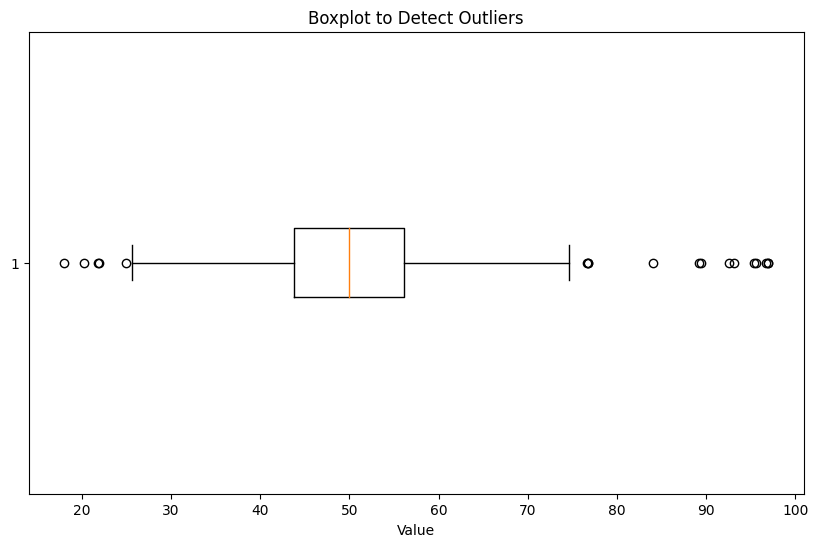

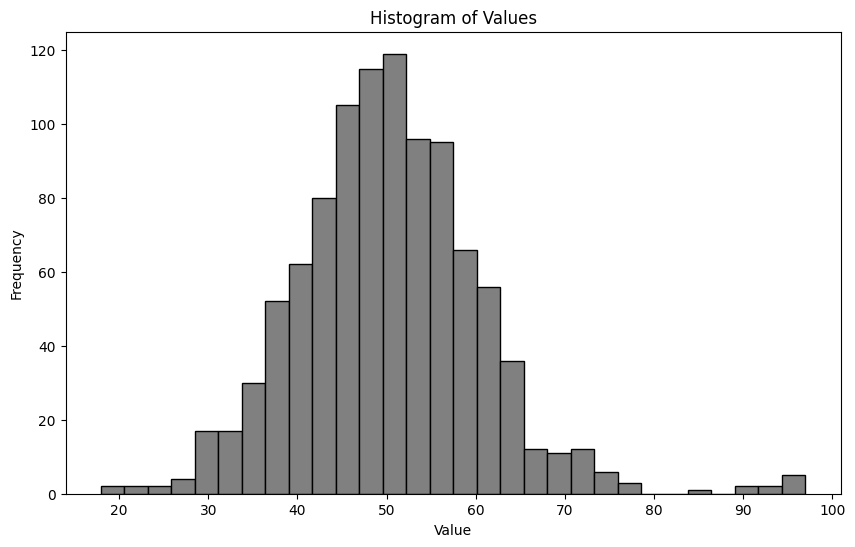

,Value
count,1010.000000
mean,50.281797
std,10.277992
min,17.955987
25%,43.751191
50%,49.979286
75%,56.137846
max,96.995637


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10)
data = np.random.normal(50, 10, 1000)
outliers = np.random.uniform(low=80, high=100, size=10)
data_with_outliers = np.concatenate([data, outliers])

df = pd.DataFrame(data_with_outliers, columns=['Value'])

# boxplot visualiazation
plt.figure(figsize=(10, 6))
plt.boxplot(df['Value'], vert=False)
plt.title('Boxplot to Detect Outliers')
plt.xlabel('Value')
plt.show()

# histogram visualization
plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=30, color='gray', edgecolor='black')
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

df.describe()

## Handling Missing Data

In [ ]:
missingRows = housing_df.sample(10).index
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ', len(housing_df['BEDROOMS']))

# remove rows with missing values
reduced_df = housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows with valid BEDROOMS values after setting to NAN:  5802
Number of rows after removing rows with missing values:  1456


In [ ]:
medianBedrooms = housing_df['BEDROOMS'].median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ', len(housing_df['BEDROOMS']))

Number of rows with valid BEDROOMS values after filling NA values:  5802


# Data Preprocessing

In [ ]:
housing_df = pd.read_csv('WestRoxbury.csv')
# housing_df = housing_df.fillna('None')
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


## Aggregation

TOOD

## Sampling

TODO

## Discretization and Binarization

### Binarization

In [ ]:
data = housing_df.copy()

pd.get_dummies(data['REMODEL'], prefix='REMODEL', prefix_sep='_', dummy_na=True)

,REMODEL_Old,REMODEL_Recent,REMODEL_nan
0,False,False,True
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
5797,False,True,False
5798,False,False,True
5799,False,False,True
5800,False,False,True


In [ ]:
data = housing_df.copy()

# because of Multicollinearity
pd.get_dummies(data['REMODEL'], prefix='REMODEL', prefix_sep='_', drop_first=True)

,REMODEL_Recent
0,False
1,True
2,False
3,False
4,False
...,...
5797,True
5798,False
5799,False
5800,False


### Discretization (Equal Width)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

data = housing_df.copy()

total_value = data['TOTAL VALUE '].values.reshape(-1, 1)

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform', subsample=None)
binned_total_value = discretizer.fit_transform(total_value)

label_mapping = {0: 'low', 1: 'medium', 2: 'high'}
data['TOTAL VALUE (Discretized)'] = pd.Series(binned_total_value.ravel()).replace(label_mapping)
data[['TOTAL VALUE ', 'TOTAL VALUE (Discretized)']]

,TOTAL VALUE,TOTAL VALUE (Discretized)
0,344.2,low
1,412.6,low
2,330.1,low
3,498.6,medium
4,331.5,low
...,...,...
5797,404.8,low
5798,407.9,low
5799,406.5,low
5800,308.7,low


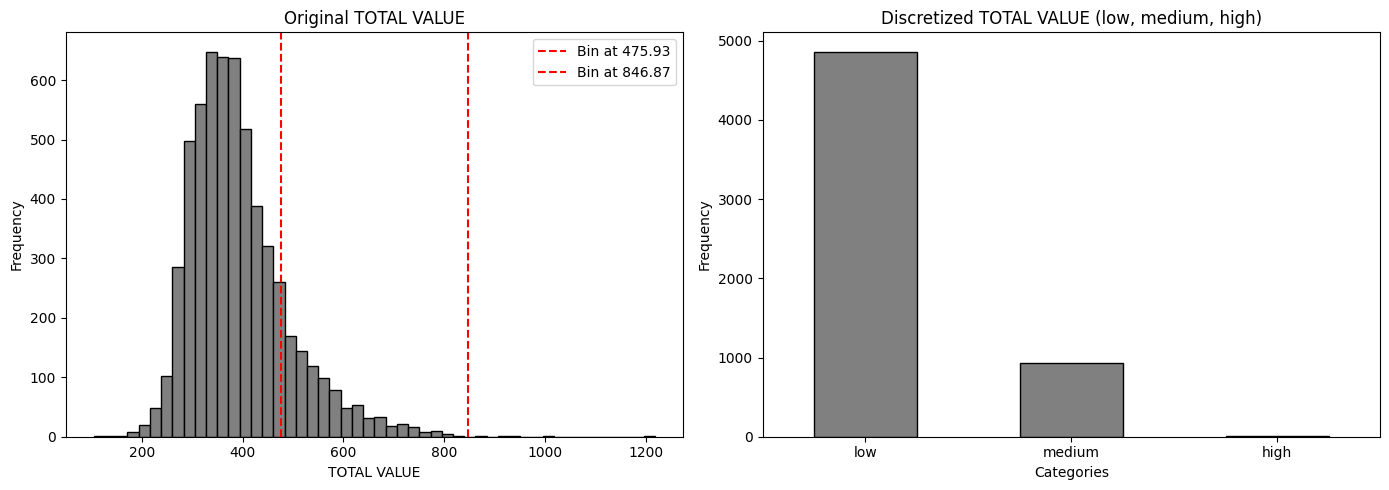

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the original 'TOTAL VALUE'
ax1.hist(data['TOTAL VALUE '], bins=50, color='gray', edgecolor='black')
ax1.set_title('Original TOTAL VALUE')
ax1.set_xlabel('TOTAL VALUE')
ax1.set_ylabel('Frequency')

# Adding discretizer to the histogram of the original data
for edge in discretizer.bin_edges_[0][1:-1]:
    ax1.axvline(edge, color='red', linestyle='--', label=f'Bin at {edge:.2f}')

ax1.legend()

# Reordering the discretized categories for plotting
category_order = ['low', 'medium', 'high']
data['TOTAL VALUE (Discretized)'].value_counts().reindex(category_order).plot(kind='bar', color='gray', edgecolor='black', ax=ax2)

ax2.set_title('Discretized TOTAL VALUE (low, medium, high)')
ax2.set_xlabel('Categories')
ax2.set_ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Discretization (Equal Frequency)

In [ ]:
  from sklearn.preprocessing import KBinsDiscretizer

  data = housing_df.copy()

  total_value = data['TOTAL VALUE '].values.reshape(-1, 1)

  discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', subsample=None)
  binned_total_value = discretizer.fit_transform(total_value)

  label_mapping = {0: 'low', 1: 'medium', 2: 'high'}
  data['TOTAL VALUE (Discretized)'] = pd.Series(binned_total_value.ravel()).replace(label_mapping)
  data[['TOTAL VALUE ', 'TOTAL VALUE (Discretized)']]

,TOTAL VALUE,TOTAL VALUE (Discretized)
0,344.2,medium
1,412.6,high
2,330.1,low
3,498.6,high
4,331.5,low
...,...,...
5797,404.8,medium
5798,407.9,medium
5799,406.5,medium
5800,308.7,low


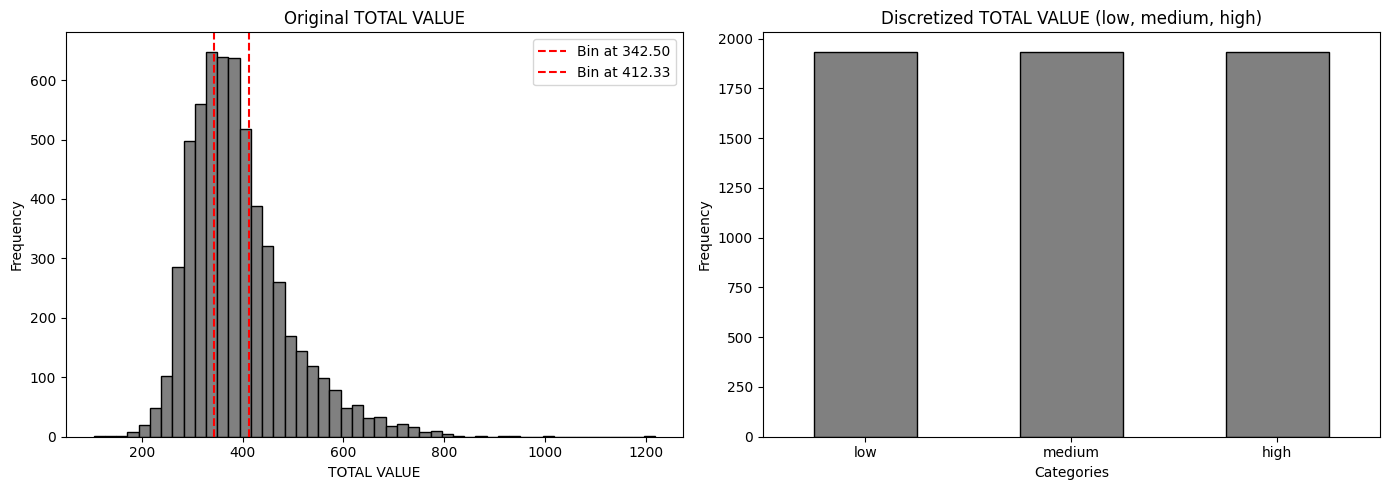

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the original 'TOTAL VALUE'
ax1.hist(data['TOTAL VALUE '], bins=50, color='gray', edgecolor='black')
ax1.set_title('Original TOTAL VALUE')
ax1.set_xlabel('TOTAL VALUE')
ax1.set_ylabel('Frequency')

# Adding discretizer to the histogram of the original data
for edge in discretizer.bin_edges_[0][1:-1]:
    ax1.axvline(edge, color='red', linestyle='--', label=f'Bin at {edge:.2f}')

ax1.legend()

# Reordering the discretized categories for plotting
category_order = ['low', 'medium', 'high']
data['TOTAL VALUE (Discretized)'].value_counts().reindex(category_order).plot(kind='bar', color='gray', edgecolor='black', ax=ax2)

ax2.set_title('Discretized TOTAL VALUE (low, medium, high)')
ax2.set_xlabel('Categories')
ax2.set_ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Discretization (Clustering-based)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

data = housing_df.copy()

total_value = data['TOTAL VALUE '].values.reshape(-1, 1)

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', subsample=None)
binned_total_value = discretizer.fit_transform(total_value)

label_mapping = {0: 'low', 1: 'medium', 2: 'high'}
data['TOTAL VALUE (Discretized)'] = pd.Series(binned_total_value.ravel()).replace(label_mapping)
data[['TOTAL VALUE ', 'TOTAL VALUE (Discretized)']]

,TOTAL VALUE,TOTAL VALUE (Discretized)
0,344.2,low
1,412.6,medium
2,330.1,low
3,498.6,medium
4,331.5,low
...,...,...
5797,404.8,medium
5798,407.9,medium
5799,406.5,medium
5800,308.7,low


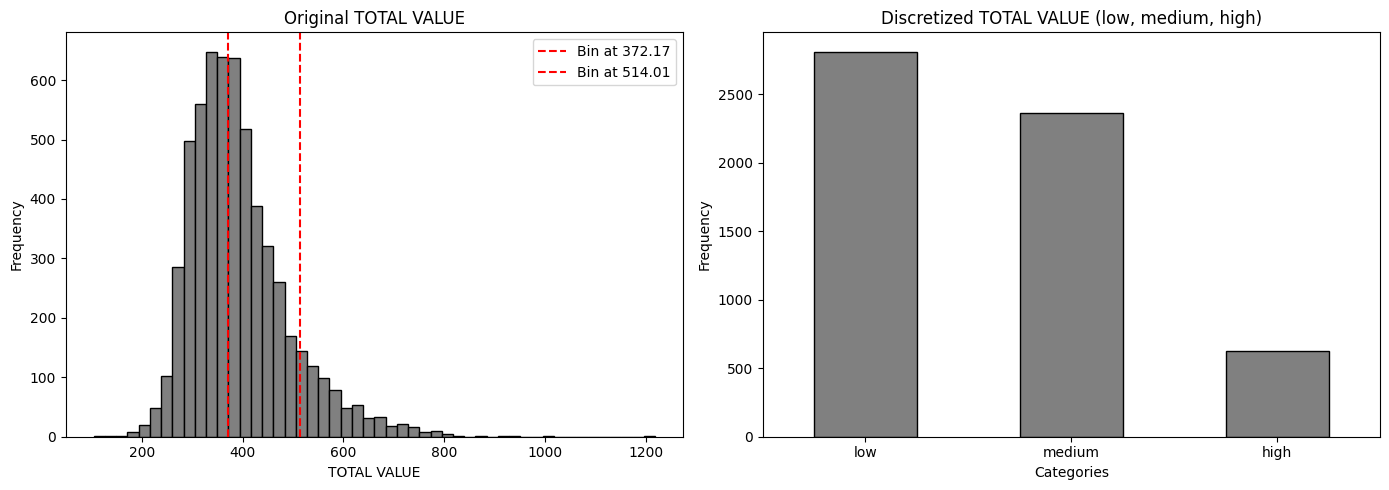

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the original 'TOTAL VALUE'
ax1.hist(data['TOTAL VALUE '], bins=50, color='gray', edgecolor='black')
ax1.set_title('Original TOTAL VALUE')
ax1.set_xlabel('TOTAL VALUE')
ax1.set_ylabel('Frequency')

# Adding discretizer to the histogram of the original data
for edge in discretizer.bin_edges_[0][1:-1]:
    ax1.axvline(edge, color='red', linestyle='--', label=f'Bin at {edge:.2f}')

ax1.legend()

# Reordering the discretized categories for plotting
category_order = ['low', 'medium', 'high']
data['TOTAL VALUE (Discretized)'].value_counts().reindex(category_order).plot(kind='bar', color='gray', edgecolor='black', ax=ax2)

ax2.set_title('Discretized TOTAL VALUE (low, medium, high)')
ax2.set_xlabel('Categories')
ax2.set_ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Variable Transformation

### Simple Functional Transformations

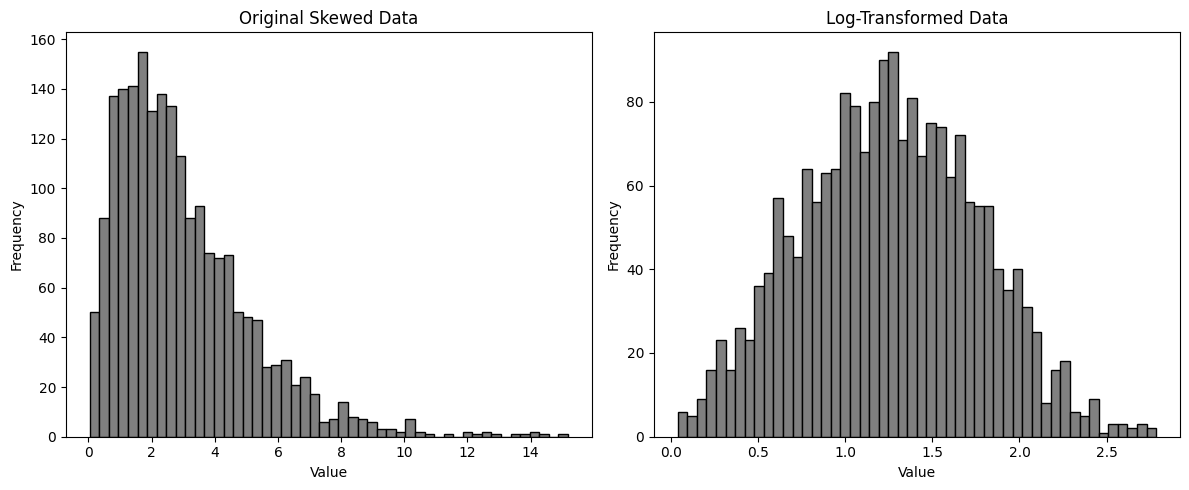

In [ ]:
# Generating gamma-distributed data to mimic skewness
new_skewed_data = np.random.gamma(shape=2, scale=1.5, size=2000)
log_transformed_data = np.log(new_skewed_data + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original skewed data
ax1.hist(new_skewed_data, bins=50, color='gray', edgecolor='black')
ax1.set_title('Original Skewed Data')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Log-transformed data
ax2.hist(log_transformed_data, bins=50, color='gray', edgecolor='black')
ax2.set_title('Log-Transformed Data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Standardization (z-score < robust)

In [ ]:
from scipy.stats import gamma


data = np.concatenate([np.random.gamma(shape=2., scale=2., size=1500), np.random.uniform(30, 50, 20)])

# Z-score normalization (subtract mean, divide by std)
z_score_normalized = (data - np.mean(data)) / np.std(data)
print(np.mean(data), np.std(data))

# Min-Max normalization (subtract min, divide by range)
min_max_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

# Robust normalization (using median and IQR)
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
robust_normalized = (data - median) / iqr
print(median, iqr)

In [ ]:
# Plotting the KDE plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

# KDE plot for original gamma distributed data
ax1.hist(data, bins=150, density=True, color='gray', edgecolor='black', alpha=0.7)
ax1.set_title('Gamma Distribution with Outliers')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# KDE plot for Z-score normalized data
ax2.hist(z_score_normalized, bins=150, density=True, color='blue', edgecolor='black', alpha=0.7)
ax2.set_title('Z-score Normalization')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')

# KDE plot for Min-Max normalized data
ax3.hist(min_max_normalized, bins=150, density=True, color='green', edgecolor='black', alpha=0.7)
ax3.set_title('Min-Max Normalization')
ax3.set_xlabel('Value')
ax3.set_ylabel('Density')

# KDE plot for Robust normalized data
ax4.hist(robust_normalized, bins=150, density=True, color='red', edgecolor='black', alpha=0.7)
ax4.set_title('Robust Normalization')
ax4.set_xlabel('Value')
ax4.set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
# Plotting Z-score and Robust normalization on the same axes for better comparison
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

# Z-score normalized data
ax1.hist(z_score_normalized, bins=150, density=True, color='blue', edgecolor='black', alpha=0.7, label='Z-score')
ax1.hist(robust_normalized, bins=150, density=True, color='red', edgecolor='black', alpha=0.5, label='Robust')
ax1.set_title('Z-score vs Robust Normalization (Overlay)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.legend()

plt.tight_layout()
plt.show()

### Standardization (z-score > robust)

 - RobustScaler: 중앙값(median)과 같은 이상치에 덜 민감한 통계량을 사용하여, 데이터를 평균이나 극단적인 값에 끌려가지 않도록 하며, 중심으로 적절히 모아주는 역할을 함. 이상치가 있더라도 중심에 있는 대부분의 값들이 안정적으로 스케일링되어 데이터가 중심에 잘 모아지게 됨

In [ ]:
from scipy.stats import gamma


# data = np.concatenate([np.random.gamma(shape=2., scale=2., size=1500)])
data = np.concatenate([np.random.normal(30, 20, size=1500)])

# Z-score normalization (subtract mean, divide by std)
z_score_normalized = (data - np.mean(data)) / np.std(data)
print(np.mean(data), np.std(data))

# Min-Max normalization (subtract min, divide by range)
min_max_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

# Robust normalization (using median and IQR)
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
robust_normalized = (data - median) / iqr
print(median, iqr)

In [ ]:
# Plotting the KDE plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

# KDE plot for original gamma distributed data
ax1.hist(data, bins=150, density=True, color='gray', edgecolor='black', alpha=0.7)
ax1.set_title('Gamma Distribution with Outliers')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# KDE plot for Z-score normalized data
ax2.hist(z_score_normalized, bins=150, density=True, color='blue', edgecolor='black', alpha=0.7)
ax2.set_title('Z-score Normalization')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')

# KDE plot for Min-Max normalized data
ax3.hist(min_max_normalized, bins=150, density=True, color='green', edgecolor='black', alpha=0.7)
ax3.set_title('Min-Max Normalization')
ax3.set_xlabel('Value')
ax3.set_ylabel('Density')

# KDE plot for Robust normalized data
ax4.hist(robust_normalized, bins=150, density=True, color='red', edgecolor='black', alpha=0.7)
ax4.set_title('Robust Normalization')
ax4.set_xlabel('Value')
ax4.set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

ax1.hist(z_score_normalized, bins=150, density=True, color='blue', edgecolor='black', alpha=0.7, label='Z-score')
ax1.hist(robust_normalized, bins=150, density=True, color='red', edgecolor='black', alpha=0.5, label='Robust')
ax1.set_title('Z-score vs Robust Normalization (Overlay)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.legend()

plt.tight_layout()
plt.show()

# Data Visualization

# 1. Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data to Illustrate Plots

In [ ]:
housing_df = pd.read_csv('BostonHousing.csv')
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df

In [ ]:
Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)
print(Amtrak_df.info())
ridership_ts

# 3. Basic Plots

## Basic Plots (Line Plot)

In [ ]:
# Using pandas:
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label
plt.show()

In [ ]:
# Using matplotlib:
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label
plt.show()

## Basic Plots (Bar Chart)

In [ ]:
# Using pandas:
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', color='gray')
ax.set_ylabel('Avg. MEDV')
plt.show()

In [ ]:
# Using matplotlib:
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color='gray')
ax.set_xticks([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')
plt.show()

## Basic Plots (Scatter Plot)

In [ ]:
# Using pandas:

housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False, color='C2')
# housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False, color='none', edgecolor='C2')
plt.show()

In [ ]:
# Using matplotlib:

## Set the color of points and draw as open circles.
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT'); plt.ylabel('MEDV')
plt.show()

## Distribution Plots (Histograms)

In [ ]:
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV'); ax.set_ylabel('count')
plt.show()

## Distribution Plots (Box Plot)

In [ ]:
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')
plt.show()

## Heat Maps (to highlight correlations)

In [ ]:
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.show()

## Heat Maps (to highlight missing values)

In [ ]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions_1000.csv').sort_values(['DATE'])

naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots(figsize=(13, 9))
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

# 4. Multidimensional Visualization

In [ ]:
# Boston housing data
housing_df = pd.read_csv('BostonHousing.csv')
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})

## Scatterplot with color added

In [ ]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])
# housing_df.plot.scatter(x='LSTAT', y='NOX', color='none', edgecolor=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

In [ ]:
# Plot first the data points for CAT.MEDV of 0 and then of 1
# Setting color to 'none' gives open circles
_, ax = plt.subplots()
for catValue, color in (0, 'C1'), (1, 'C0'):
    subset_df = housing_df[housing_df.CAT_MEDV == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])

plt.show()

## Bar Plot - 3 Variables

In [ ]:
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
dataForPlot_df

In [ ]:
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']

ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

yRange = [0, max(dataForPlot_df) * 1.1]

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))
axes[0].set_ylabel('MEDV')
axes[1].set_ylabel('MEDV')

plt.show()

## Matrix Scatterplot

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
df

In [ ]:
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate('%.3f' %corr[i,j], (0.8, 0.8),
                        xycoords='axes fraction', ha='center', va='center')

plt.show()

# 5. Specialized Visualization

## Network Data Visualization

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx

In [ ]:
ebay_df = pd.read_csv('eBayNetwork.csv')
ebay_df

In [ ]:
G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)

plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')
plt.show()

## Hierarchical Data Visualization (Treemaps)

In [ ]:
!pip install squarify

In [ ]:
import textwrap
import squarify

In [ ]:
ebayTreemap = pd.read_csv('EbayTreemap.csv')
ebayTreemap

In [ ]:
grouped = []
for category, df in ebayTreemap.groupby('Category'):
    negativeFeedback = sum(df['Seller Feedback'] < 0) / len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': df['High Bid'].mean()
    })
byCategory = pd.DataFrame(grouped)
byCategory

In [ ]:
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

wrapped_labels = wrap_labels(byCategory.category, width=15)

norm = matplotlib.colors.Normalize(vmin=byCategory.negativeFeedback.min(),
                                   vmax=byCategory.negativeFeedback.max())
colors = [matplotlib.cm.Blues(norm(value)) for value in byCategory.negativeFeedback]

fig, ax = plt.subplots(figsize=(12, 6))

squarify.plot(label=wrapped_labels, sizes=byCategory.averageBid, color=colors,
              ax=ax, alpha=0.6, edgecolor='grey')

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.show()

## Geographical Data Visualization – Map Charts

In [ ]:
!pip install cartopy

In [ ]:
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

In [ ]:
gdp_df = pd.read_csv('gdp.csv', skiprows=4)
gdp_df.rename(columns={'2015': 'GDP2015'}, inplace=True)
# use three letter country code to access
gdp_df.set_index('Country Code', inplace=True)
gdp_df

In [ ]:
gdp_df.describe()

In [ ]:
# Log-transform the GDP values
gdp_df['log_GDP2015'] = gdp_df['GDP2015'].apply(lambda x: np.log(x) if x > 0 else np.nan)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Original GDP boxplot
axs[0].boxplot(gdp_df['GDP2015'].dropna())
axs[0].set_title('GDP in 2015')
axs[0].set_ylabel('GDP (in USD)')

# Log-transformed GDP boxplot
axs[1].boxplot(gdp_df['log_GDP2015'].dropna())
axs[1].set_title('Log-transformed GDP in 2015')
axs[1].set_ylabel('Log(GDP)')

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-150, 60, -25, 60])

# Create a color mapper
cmap = plt.cm.Blues
norm = matplotlib.colors.LogNorm(vmin=gdp_df.GDP2015.dropna().min(), vmax=gdp_df.GDP2015.dropna().max())
# norm = matplotlib.colors.Normalize(vmin=gdp_df.GDP2015.dropna().min(), vmax=gdp_df.GDP2015.dropna().max())

shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    countryCode = country.attributes['ADM0_A3']
    if countryCode in gdp_df.index:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=cmap(norm(gdp_df.loc[countryCode].GDP2015)))

ax.set_title("GDP 2015")
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cb = plt.colorbar(sm, ax=ax)

plt.tight_layout()
plt.show()